In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import datetime

In [13]:
df = pd.read_csv("timeSeries19CovidCombined.csv")
df.head()

,Date,Country/Region,Province/State,Lat,Long,Confirmed,Recovered,Deaths
0,2020-01-22,Afghanistan,NaN,33.93911,67.709953,0,0.0,0
1,2020-01-23,Afghanistan,NaN,33.93911,67.709953,0,0.0,0
2,2020-01-24,Afghanistan,NaN,33.93911,67.709953,0,0.0,0
3,2020-01-25,Afghanistan,NaN,33.93911,67.709953,0,0.0,0
4,2020-01-26,Afghanistan,NaN,33.93911,67.709953,0,0.0,0


In [3]:
df.describe()

,Lat,Long,Confirmed,Recovered,Deaths
count,72090.000000,72090.000000,7.209000e+04,6.831000e+04,72090.000000
mean,20.961559,23.343773,4.284619e+04,2.760750e+04,1610.020807
std,24.882193,70.429778,3.257632e+05,2.119790e+05,10272.269230
min,-51.796300,-135.000000,0.000000e+00,0.000000e+00,0.000000
25%,6.428055,-15.310100,1.600000e+01,3.000000e+00,0.000000
50%,22.300000,20.939400,4.400000e+02,2.020000e+02,6.000000
75%,41.153300,80.771797,4.688750e+03,2.150000e+03,89.000000
max,71.706900,178.065000,8.106384e+06,6.524595e+06,219286.000000


In [4]:
df.isnull().sum()

Date                  0
Country/Region        0
Province/State    50220
Lat                   0
Long                  0
Confirmed             0
Recovered          3780
Deaths                0
dtype: int64

In [5]:
df.fillna(df.mean(),inplace=True)

C:\Users\STDC Tourism Counter\AppData\Local\Temp\ipykernel_27444\2085774198.py:1: FutureWarning: The default value of numeric_only in DataFrame.mean is deprecated. In a future version, it will default to False. In addition, specifying 'numeric_only=None' is deprecated. Select only valid columns or specify the value of numeric_only to silence this warning.
  df.fillna(df.mean(),inplace=True)


In [6]:
df.dtypes

Date               object
Country/Region     object
Province/State     object
Lat               float64
Long              float64
Confirmed           int64
Recovered         float64
Deaths              int64
dtype: object

In [7]:
df['Date'] = pd.to_datetime(df['Date'])
df.set_index('Date', inplace=True)

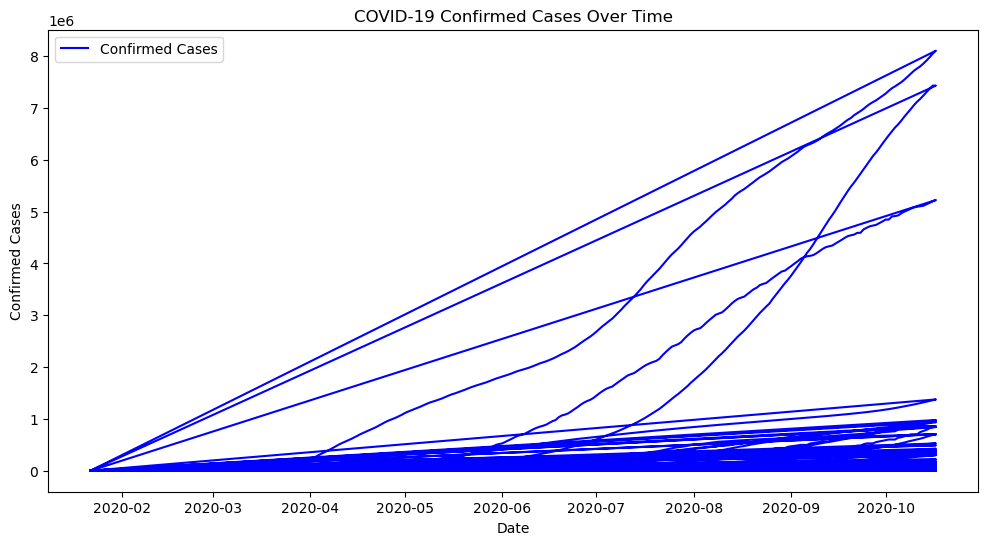

In [9]:
plt.figure(figsize=(12, 6))
plt.plot(df.index, df['Confirmed'], label='Confirmed Cases', color='blue')
plt.xlabel('Date')
plt.ylabel('Confirmed Cases')
plt.title('COVID-19 Confirmed Cases Over Time')
plt.legend()
plt.show()

C:\Users\STDC Tourism Counter\AppData\Local\Temp\ipykernel_27444\3569662833.py:1: FutureWarning: The default value of numeric_only in DataFrameGroupBy.mean is deprecated. In a future version, numeric_only will default to False. Either specify numeric_only or select only columns which should be valid for the function.
  df_monthly = df.resample('M').mean()


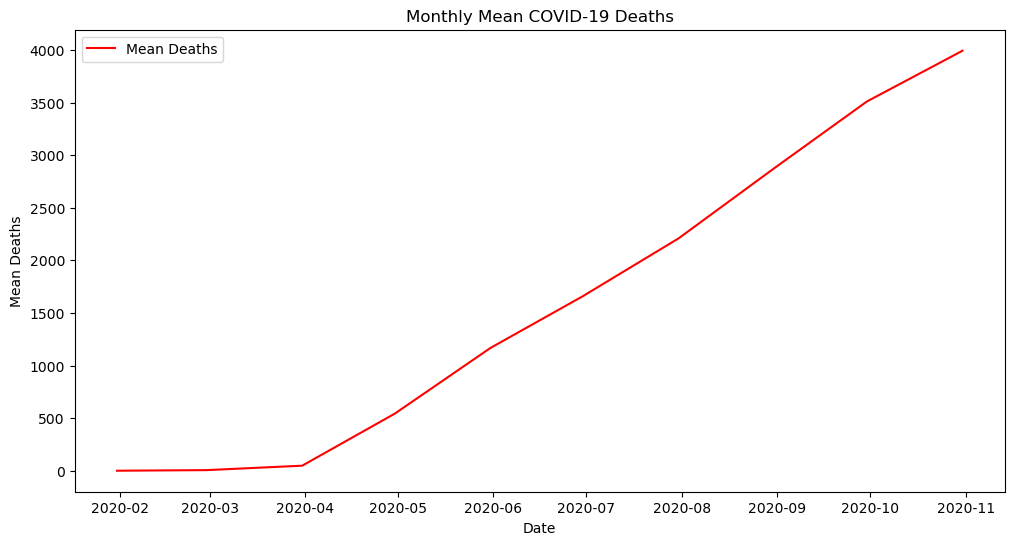

In [10]:
df_monthly = df.resample('M').mean()
plt.figure(figsize=(12, 6))
plt.plot(df_monthly.index, df_monthly['Deaths'], label='Mean Deaths', color='red')
plt.xlabel('Date')
plt.ylabel('Mean Deaths')
plt.title('Monthly Mean COVID-19 Deaths')
plt.legend()
plt.show()

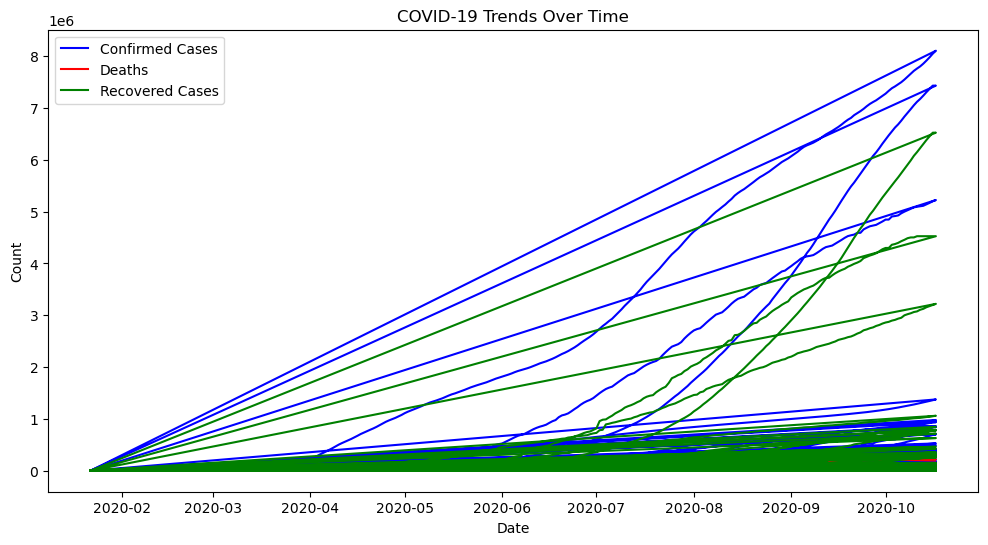

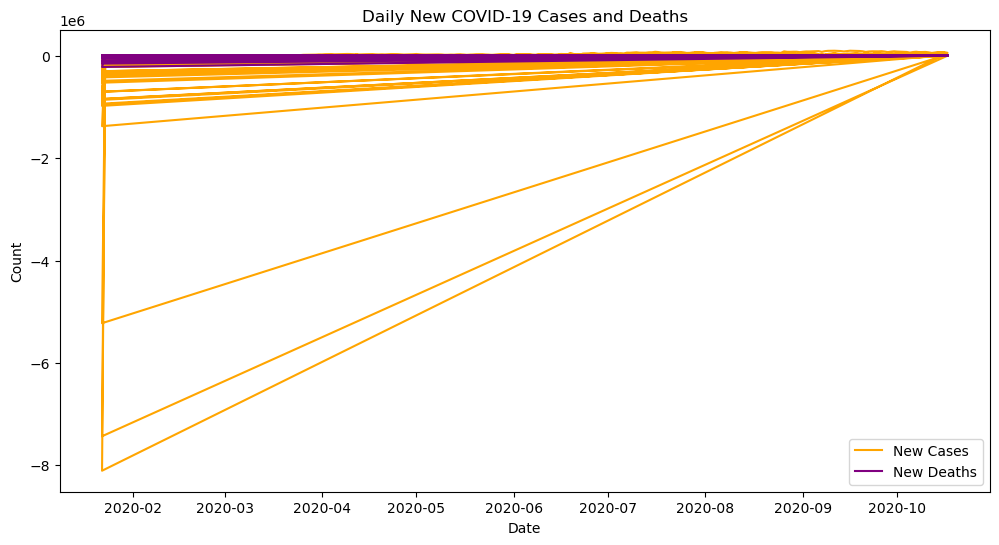

Classification Report:
              precision    recall  f1-score   support

           0       0.84      0.89      0.87      6847
           1       0.90      0.85      0.87      7571

    accuracy                           0.87     14418
   macro avg       0.87      0.87      0.87     14418
weighted avg       0.87      0.87      0.87     14418



In [14]:
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import classification_report

# Step 1: Read the CSV file into a pandas DataFrame
file_path = "time-series-19-covid-combined.csv"
df = pd.read_csv(file_path)

# Step 2: Convert the 'Date' column to datetime type and set it as the index
df['Date'] = pd.to_datetime(df['Date'])
df.set_index('Date', inplace=True)

# Step 3: Preprocessing
# Drop unnecessary columns, if any
df.drop(['Province/State', 'Country/Region', 'Lat', 'Long'], axis=1, inplace=True)

# Fill missing values with 0 (assuming missing values mean no cases/deaths/recoveries)
df.fillna(0, inplace=True)

# Step 4: Exploratory Data Analysis (EDA)
# Example 1: Plot the trends of confirmed, deaths, and recovered cases over time
plt.figure(figsize=(12, 6))
plt.plot(df.index, df['Confirmed'], label='Confirmed Cases', color='blue')
plt.plot(df.index, df['Deaths'], label='Deaths', color='red')
plt.plot(df.index, df['Recovered'], label='Recovered Cases', color='green')
plt.xlabel('Date')
plt.ylabel('Count')
plt.title('COVID-19 Trends Over Time')
plt.legend()
plt.show()

# Example 2: Plot the daily new cases and deaths
df['New_Cases'] = df['Confirmed'].diff()
df['New_Deaths'] = df['Deaths'].diff()

plt.figure(figsize=(12, 6))
plt.plot(df.index, df['New_Cases'], label='New Cases', color='orange')
plt.plot(df.index, df['New_Deaths'], label='New Deaths', color='purple')
plt.xlabel('Date')
plt.ylabel('Count')
plt.title('Daily New COVID-19 Cases and Deaths')
plt.legend()
plt.show()

# Step 5: Prepare data for classification
# Create a binary target variable 'Class' based on whether the cases increased or not
df['Class'] = df['New_Cases'].apply(lambda x: 1 if x > 0 else 0)

# Remove rows with missing values in the target variable
df.dropna(subset=['Class'], inplace=True)

# Define features and target
X = df[['Confirmed', 'Deaths', 'Recovered']]
y = df['Class']

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Step 6: Classification using Random Forest
clf = RandomForestClassifier(random_state=42)
clf.fit(X_train, y_train)

# Step 7: Classification Report
y_pred = clf.predict(X_test)
print("Classification Report:")
print(classification_report(y_test, y_pred))
